## Hash Table Test cases

Generated using ChatGPT

Overview
- Intialize
- setItem, getItem and remove
- keys, keyExists, isEmpty and clear
- capacity and numItems
- Performance Test setItem() and remove() - 1 million items

### Initialise

In [1]:
import sys
import os
import unittest
import time

sys.path.append(os.path.abspath(".."))

from datastructures.HashTable import HashTable

### setItem, getItem and remove

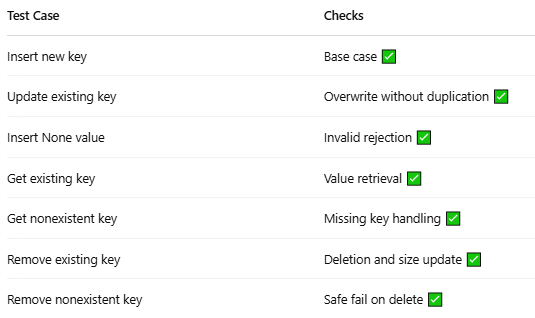

In [2]:
class TestHashTableCore(unittest.TestCase):

    def test_set_item_new_key(self):
        """Set a new key-value pair and verify insertion."""
        ht = HashTable()
        result = ht.setItem("key1", "value1")
        self.assertTrue(result)
        self.assertEqual(ht.numItems(), 1)
        self.assertEqual(ht.getItem("key1"), "value1")

    def test_set_item_updates_existing_key(self):
        """Set the same key twice with different values (should update)."""
        ht = HashTable()
        ht.setItem("key1", "value1")
        result = ht.setItem("key1", "updated")
        self.assertTrue(result)
        self.assertEqual(ht.numItems(), 1)  # Should not increase size
        self.assertEqual(ht.getItem("key1"), "updated")

    def test_set_none_value(self):
        """Attempt to set None value (should return False and not insert)."""
        ht = HashTable()
        result = ht.setItem("key1", None)
        self.assertFalse(result)
        self.assertEqual(ht.numItems(), 0)
        self.assertIsNone(ht.getItem("key1"))

    def test_get_item_existing_key(self):
        """Get value for existing key."""
        ht = HashTable()
        ht.setItem("alpha", 42)
        self.assertEqual(ht.getItem("alpha"), 42)

    def test_get_item_nonexistent_key(self):
        """Get value for non-existent key (should return None)."""
        ht = HashTable()
        self.assertIsNone(ht.getItem("ghost"))

    def test_remove_existing_key(self):
        """Remove an existing key and verify it's gone."""
        ht = HashTable()
        ht.setItem("temp", "hot")
        self.assertTrue(ht.remove("temp"))
        self.assertEqual(ht.numItems(), 0)
        self.assertIsNone(ht.getItem("temp"))

    def test_remove_nonexistent_key(self):
        """Try removing a key that doesn't exist."""
        ht = HashTable()
        self.assertFalse(ht.remove("phantom"))
        self.assertEqual(ht.numItems(), 0)

# Run test suite in Jupyter Notebook
unittest.TextTestRunner().run(unittest.TestLoader().loadTestsFromTestCase(TestHashTableCore))

.......
----------------------------------------------------------------------
Ran 7 tests in 0.006s

OK


<unittest.runner.TextTestResult run=7 errors=0 failures=0>

### keys, keyExists, isEmpty and clear

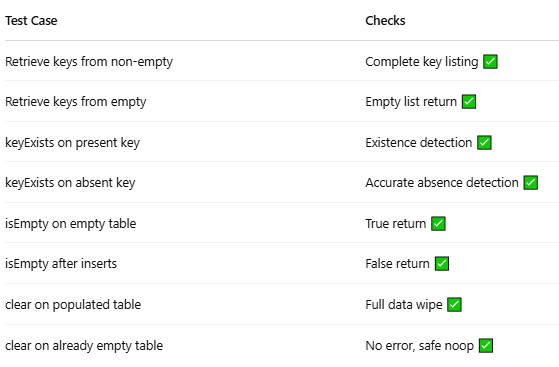

In [3]:
class TestHashTableAuxiliaryMethods(unittest.TestCase):

    def test_keys_on_non_empty_table(self):
        ht = HashTable()
        ht.setItem("a", 1)
        ht.setItem("b", 2)
        keys = ht.keys()
        self.assertIn("a", keys)
        self.assertIn("b", keys)
        self.assertEqual(len(keys), 2)

    def test_keys_on_empty_table(self):
        ht = HashTable()
        self.assertEqual(ht.keys(), [])

    def test_keyExists_present_key(self):
        ht = HashTable()
        ht.setItem("key", "val")
        self.assertTrue(ht.keyExists("key"))

    def test_keyExists_absent_key(self):
        ht = HashTable()
        ht.setItem("key", "val")
        self.assertFalse(ht.keyExists("missing"))

    def test_isEmpty_on_new_table(self):
        ht = HashTable()
        self.assertTrue(ht.isEmpty())

    def test_isEmpty_after_insert(self):
        ht = HashTable()
        ht.setItem("x", 100)
        self.assertFalse(ht.isEmpty())

    def test_clear_on_filled_table(self):
        ht = HashTable()
        ht.setItem("one", 1)
        ht.setItem("two", 2)
        ht.clear()
        self.assertTrue(ht.isEmpty())
        self.assertEqual(ht.numItems(), 0)
        self.assertEqual(ht.keys(), [])

    def test_clear_on_empty_table(self):
        ht = HashTable()
        ht.clear()  # Should not throw
        self.assertTrue(ht.isEmpty())

# Run in Jupyter Notebook
unittest.TextTestRunner().run(unittest.TestLoader().loadTestsFromTestCase(TestHashTableAuxiliaryMethods))


........
----------------------------------------------------------------------
Ran 8 tests in 0.005s

OK


<unittest.runner.TextTestResult run=8 errors=0 failures=0>

### capacity and numItems

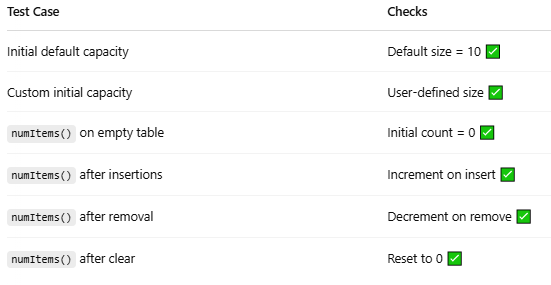

In [4]:
class TestHashTableCapacityAndCount(unittest.TestCase):

    def test_initial_capacity(self):
        ht = HashTable()
        self.assertEqual(ht.capacity(), 10)

    def test_custom_initial_capacity(self):
        ht = HashTable(size=25)
        self.assertEqual(ht.capacity(), 25)

    def test_numItems_on_empty(self):
        ht = HashTable()
        self.assertEqual(ht.numItems(), 0)

    def test_numItems_after_inserts(self):
        ht = HashTable()
        ht.setItem("a", 1)
        ht.setItem("b", 2)
        ht.setItem("c", 3)
        self.assertEqual(ht.numItems(), 3)

    def test_numItems_after_removal(self):
        ht = HashTable()
        ht.setItem("x", 100)
        ht.setItem("y", 200)
        ht.remove("x")
        self.assertEqual(ht.numItems(), 1)

    def test_numItems_after_clear(self):
        ht = HashTable()
        ht.setItem("x", 1)
        ht.setItem("y", 2)
        ht.clear()
        self.assertEqual(ht.numItems(), 0)

# Run in Jupyter Notebook
unittest.TextTestRunner().run(unittest.TestLoader().loadTestsFromTestCase(TestHashTableCapacityAndCount))


......
----------------------------------------------------------------------
Ran 6 tests in 0.005s

OK


<unittest.runner.TextTestResult run=6 errors=0 failures=0>

### Performance Test setItem() and remove() - 1 million items

CPU Intel i7-6700K 4.0Ghz 4 cores 

RAM 32GB DD4 3200MHZ Dual Frequency 

In [5]:
def performance_test_hash_table_with_removal(n=1_000_000):
    ht = HashTable(size=1_500_000)

    print(f"Inserting {n:,} items into HashTable...")
    start_time = time.time()

    for i in range(n):
        ht.setItem(f"key{i}", i)

    insert_time = time.time() - start_time
    print(f"Insertion complete in {insert_time:.2f} seconds")
    print(f"Total items: {ht.numItems()}")

    print("\nStarting removal of all items...")
    start_time = time.time()

    for i in range(n):
        ht.remove(f"key{i}")

    remove_time = time.time() - start_time
    print(f"Removal complete in {remove_time:.2f} seconds")
    print(f"Items after removal: {ht.numItems()}")
    print(f"HashTable is empty? {ht.isEmpty()}")

In [6]:
performance_test_hash_table_with_removal()

Inserting 1,000,000 items into HashTable...
Insertion complete in 2051.24 seconds
Total items: 1000000

Starting removal of all items...
Removal complete in 6.20 seconds
Items after removal: 0
HashTable is empty? True
